## What is the True Normal Human Body Temperature?
### Background
The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

More information on this dataset can be found here: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm

Let's start with looking at the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as sms
%matplotlib inline
sns.set(color_codes= True)
sns.mpl.rc("figure", figsize=(6, 4))

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### Step 1. One variable exploration:
I start with exploring temperature first.The mean and standard deviations are 98.25 and 0.73, respectively. Let's look at the boxplot to see IQR:

C:\Users\Bis\Anaconda2\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


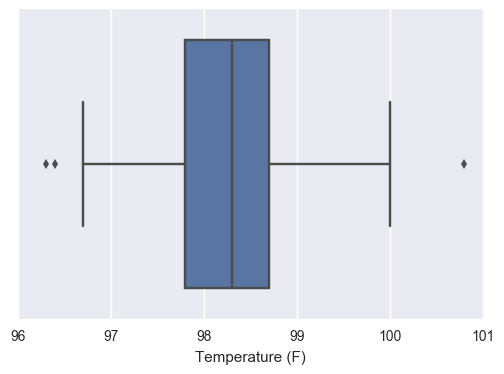

In [6]:
sns.boxplot(df.temperature, vert = False);
plt.xlabel('Temperature (F)')

<li> ** Is the sample distribution normal? ** 
<p> Let's assume that the sample is a true representative of the population. Then it is likely that the population distribution would also be normal if the sample is approximately normally distributed. However, according to the central limit theorem, even if the population distribution is unknown or not normal, the distribution of sample means will be normal if the sample size is large enough. If the sample distribution is not normal, there are ways to approximate the population distribution. 
<p> Let's look at the sample distribution before doing anything else:

In [7]:
np.sqrt(130) # to estimate the number of bins (square root of total number of datapoints)

11.401754250991379

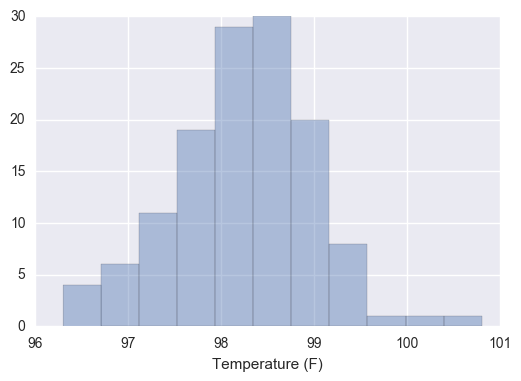

In [8]:
sns.distplot(df.temperature,  kde= False, bins = 11, rug= False)
plt.xlabel('Temperature (F)')

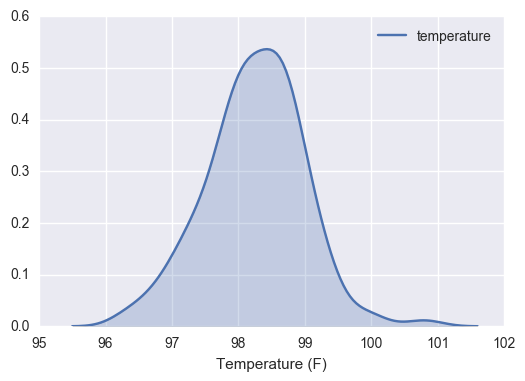

In [9]:
sns.kdeplot(df.temperature, shade=True); # We can do a kernel density estimation and plot the distribution function.
plt.xlabel('Temperature (F)')

<li> The next couple of cells are just to see if the temperature was recorded in F or C. If we plot histogram with 0.1 degree separation, there is a periodic rise and fall, indicating a 0.1 round off. Therefore, the original data was in centrigrade. see here: https://ww2.amstat.org/PUBLICATIONS/JSE/v4n2/datasets.shoemaker.html

In [10]:
(df.temperature.max()-df.temperature.min())*0.23 # to plot the tempr with approximately .1 degree separation

1.0350000000000001

In [11]:
(df.temperature.max()-df.temperature.min())*0.46

2.0700000000000003

In [12]:
#sns.distplot(df.temperature,  kde= False, bins = 23, rug= False)
#plt.xlabel('Temperature (F)')

In [13]:
#sns.distplot(df.temperature,  kde= False, bins = 46, rug= False)
#plt.xlabel('Temperature (F)')

<li> The sample approximately follows a normal distribution with $\bar{x} $ = 98.25 and $s$ = 0.73. We can do a number of normality tests to see if the population follows the similar distribution as the sample: 

<p> we can do a probplot:

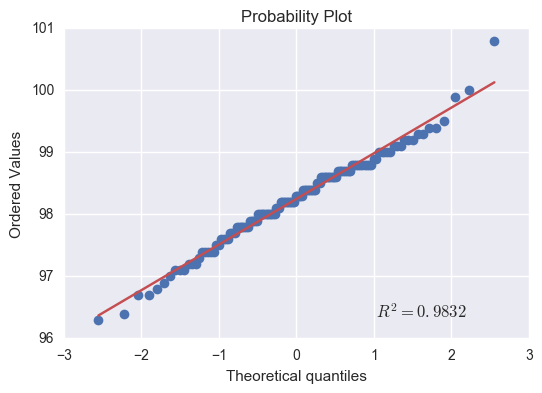

In [14]:
st.probplot(df.temperature, dist = 'norm', fit=True, plot = plt, rvalue=True)
plt.show()

<li> A good line fit with a $R^2$ value of 0.983. This strongly suggests that the distribution of the population from which the sample is drawn is likely to be same. We can do other normality tests too:

In [15]:
st.mstats.normaltest(df.temperature, axis=0) # D’Agostino and Pearson normality test # see plotly's normality test

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [16]:
st.shapiro(df.temperature) # Shapiro Wilk normality test 

(0.9865769743919373, 0.2331680953502655)

In [17]:
anderson_results = st.anderson(df.temperature) # Anderson Darling normality test
anderson_results

AndersonResult(statistic=0.52010388267143526, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [18]:
anderson_results[0], anderson_results[1][2] # t-stat and p-value

(0.52010388267143526, 0.76500000000000001)

In [19]:
st.kstest(df.temperature, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [20]:
st.skewtest(df.temperature)

SkewtestResult(statistic=-0.021370491432771001, pvalue=0.98295011261353815)

p-value 0.98 meaning that we cannot reject that our sample has skew and kurtosis in the distribution. ** BUTdoes it mean that it has a negative skew? becasue the stat is negative?**

In [21]:
st.kurtosistest(df.temperature) # kurtosis test

KurtosistestResult(statistic=1.6441851280847679, pvalue=0.10013796794683075)

In [22]:
st.normaltest(df.temperature) # both skew and kurtosis

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

<li> The probability plot and other normality tests suggest **NOT** to reject the null hypothesis (i.e., $H_0$:the sample is derived from a population which follows a particular distribution. In this case, it is a  normal distribution). 

<p> We can either use a z-test or t-test. The z-test can be performed when population standard deviation ($\sigma$) is known and sample size > 30. Since we don't know ($\sigma$), we should perform a t-test but given a strong likeliness of the sample drawn from a normal distribution we can perform a z-test. Since, this is an exploratory situation, we will do both and compare the results. Here, the other thing is to mention that the temperature is an independent variable because one measurement does not change or influence other ones and vice versa.

<p> We estimate the population mean $\mu$ as 98.6$^{\circ}$F because it is the popular belief. So our null hypothesis is <p> $H_0$ = $\mu$ = 98.6  and alternate hypothesis $H_a \neq$ 98.6.

In [23]:
sms.ztest(df.temperature, value=98.6, alternative='two-sided')

(-5.4548232923645195, 4.9021570141012155e-08)

<li> p-value < .001 suggests that we can reject the null hypothesis (actual mean is **NOT** 98.6). Let's see if we get a similar result with one sample t-test.

In [24]:
st.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

<li> t-test also indicates essentially the same results. Now let's calculate t-test with the sample mean and the confidence intervals at 95% and 99% levels.

In [25]:
st.ttest_1samp(df.temperature, np.mean(df.temperature))

Ttest_1sampResult(statistic=-4.419868934050681e-13, pvalue=0.99999999999964806)

In [26]:
st.norm.interval(0.95, loc=np.mean(df.temperature), scale=np.std(df.temperature)/np.sqrt(len(df.temperature)))

(98.123682111456645, 98.37477942700491)

In [27]:
st.norm.interval(0.95, loc=np.mean(df.temperature), scale=st.sem(df.temperature)) 
# note that sem stats.sem(a) == a.std(ddof=1) / np.sqrt(len(a)) except for floating point errors 

(98.123196428181657, 98.375265110279898)

In [28]:
st.norm.interval(0.99, loc=np.mean(df.temperature), scale=np.std(df.temperature)/np.sqrt(len(df.temperature)))

(98.084231864012764, 98.414229674448791)

So, even at the 99% confidence level, the "normal" temperature (in between 98.08 to 98.41 $^{\circ}$F) is below 98.6$^{\circ}$F, contradictory to popular belief!!! Again, similar result is obtained using t-test.

In [29]:
st.t.interval(0.95, len(df.temperature)-1, loc=np.mean(df.temperature), scale=st.sem(df.temperature))

(98.122002905608042, 98.376458632853513)

In [30]:
st.sem(df.temperature), np.std(df.temperature)

(0.064304416837891024, 0.7303577789050377)

<li> Note that the standard error of the mean (0.06) is much smaller than the sample standard deviation (.73). This is what we expect. 

<p> Let's simulate our sample and see if we can come to the same solutions as scipy stats t-test and z-test did. We will use three steps: <p> 1) Create a randomly chosen normal distribution with mu and sigma (sample mean and standard deviation). <p> 2) Compute the mean of this distribution (xbar). <p> 3) Repeat steps 1 and 2 1000 times (arbitrary) and make a distribution of xbar.

In [31]:
m = 1000
n = 130
mu = 98.25
sigma  = 0.73

means = []
for j in range(m):
    xs = np.random.normal(mu, sigma, n)
    xbar = np.mean(xs)
    means.append(xbar)
means.sort()

Plot a histogram and corresponding density distribution and CIs. 

CI at 95% level:
(98.126413801921515, 98.372871997033982)
CI at 99% level:
(98.087692413122397, 98.4115933858331)
The mean of sample distributions:
98.2496428995


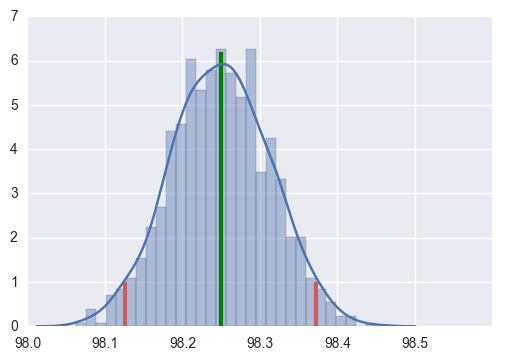

In [32]:
cint1 = st.norm.interval(0.95, loc=np.mean(means), scale=np.std(means))[0]
cint2 = st.norm.interval(0.95, loc=np.mean(means), scale=np.std(means))[1]
print ('CI at 95% level:')
print(cint1, cint2)
print ('CI at 99% level:')
print (st.norm.interval(0.99, loc=np.mean(means), scale=np.std(means)))
mean1 = np.mean(means)
print ("The mean of sample distributions:")
print (mean1)
sns.distplot(means,  kde=True, bins = 30 , rug=False)
plt.vlines(cint1, 0, 1, color = 'indianred', linewidth=3)
plt.vlines(cint2, 0, 1, color = 'indianred', linewidth=3)
plt.vlines(mean1, 0, 6.2, color = 'green', linewidth=3)

### Step 2. Is the male temperature different from the female one? (two-sample test)
The question is, if we randomly chose a man and woman, will their temperature be different? What is the probability that if we see a such difference, it would happen purely by chance? How certain are we in our results?

In [33]:
df_m = df[df.gender == 'M'] # Sliced the dataset with male only values. I kept the heart rate too.
df_m.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [34]:
df_f = df[df.gender == 'F'] #Female data
df_f.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [35]:
df_m.mean()[0], df_f.mean()[0]

(98.1046153846154, 98.393846153846127)

In [36]:
mean_temp_diff = df_m.mean()[0] - df_f.mean()[0]
mean_temp_diff

-0.28923076923072699

In [37]:
std_temp_diff = df_m.std()[0] - df_f.std()[0]
std_temp_diff

-0.044731990404775712

<li> There is a mean temperature difference between men and women, with women having the higher body temperature. Let's see some histograms, density functions and probability plots for these two sub samples:

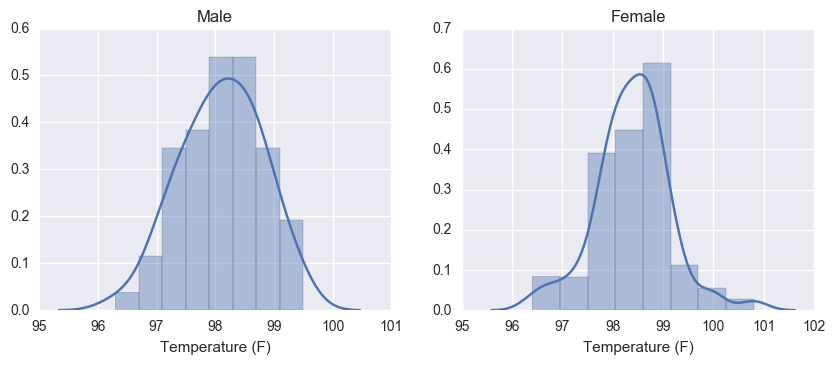

In [38]:
plt.figure(figsize=(10, 8))
plt.subplot(221)
sns.distplot(df_m.temperature,  kde=True, bins = 8, rug=False)
plt.title ("Male")
plt.xlabel ('Temperature (F)')
plt.subplot(222)
sns.distplot(df_f.temperature,  kde=True, bins = 8, rug=False)
plt.title ("Female")
plt.xlabel ('Temperature (F)')

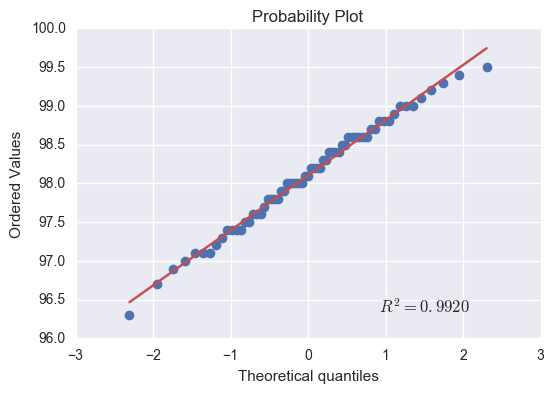

In [39]:
st.probplot(df_m.temperature, dist = 'norm', fit=True, plot = plt, rvalue=True)
plt.show()

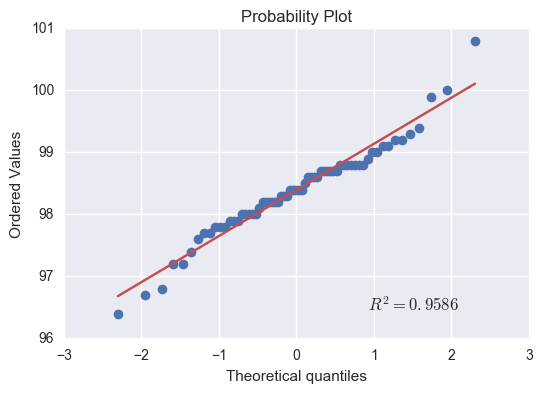

In [40]:
st.probplot(df_f.temperature, dist = 'norm', fit=True, plot = plt, rvalue=True)
plt.show()

A bit different $R^2$ values but still good straight line fit. So  most likely the population is normal.

In [41]:
dg = df.groupby('gender') 
dg.describe()# Just to see male and female features in a single table

heart_rate  temperature
gender                               
F      count   65.000000    65.000000
       mean    74.153846    98.393846
       std      8.105227     0.743488
       min     57.000000    96.400000
       25%     68.000000    98.000000
       50%     76.000000    98.400000
       75%     80.000000    98.800000
       max     89.000000   100.800000
M      count   65.000000    65.000000
       mean    73.369231    98.104615
       std      5.875184     0.698756
       min     58.000000    96.300000
       25%     70.000000    97.600000
       50%     73.000000    98.100000
       75%     78.000000    98.600000
       max     86.000000    99.500000

In [42]:
dg.var()

,temperature,heart_rate
gender,,
F,0.552774,65.694712
M,0.488260,34.517788


<li> Let's apply a two sample t-stat test where our null hypothesis is that there is no difference (in means) between two groups. The difference we see in this sample is purely by chance. So what's the probability that it actually happens by chance in the population or in other samples?

In [43]:
st.ttest_ind(df_m.temperature, df_f.temperature, axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

In [44]:
cm = sms.CompareMeans(sms.DescrStatsW(df_m.temperature), sms.DescrStatsW(df_f.temperature))
print (cm.tconfint_diff(usevar='unequal'))

(-0.53964855913508725, -0.038812979326423636)


In [45]:
cm_z = sms.CompareMeans(sms.DescrStatsW(df_m.temperature), sms.DescrStatsW(df_f.temperature))
cm_z.zconfint_diff(usevar = 'unequal')

(-0.53727195415488294, -0.041189584306627919)

<li> p-value is low in all tests (~2-4%) - which is less the 5% and therefore we reject the null hypothesis. This means that the difference in temperature is statistically significant and we might see this in another sample or in general population. There is a certain probability that female temperature may be higher than the male. 

Let's look at the data in more *"pythonic way"* according to Allen Downey's lecture:
The null hypothesis is that there is **NO** difference between the groups. 

In [46]:
m_t_mean = df_m.temperature.mean()
m_t_std = df_m.temperature.std()
f_t_mean = df_f.temperature.mean()
f_t_std = df_f.temperature.std() # Mean and std dev. of male and female samples

In [47]:
thres = (m_t_mean*m_t_std + f_t_mean*f_t_std)/(m_t_std + f_t_std)
m_t_mean, f_t_mean, thres

(98.1046153846154, 98.39384615384613, 98.25371609638215)

In [48]:
mbt = float(sum(df_m.temperature.values > thres)) #male(temp) above threshold
mbt

28.0

In [49]:
fat = float(sum(df_f.temperature.values < thres)) #female(temp) below threshold
fat

27.0

In [50]:
overlap = mbt/len(df_m) + fat/len(df_f)
misclassification_rate = overlap/2
overlap, misclassification_rate
# very small overlap (so if we take the male sample temperature it would not be different than the fmale ones )

(0.8461538461538463, 0.42307692307692313)

Misclassification rate is 0.42 - meaning that 42% of the time the temperature of a randomly chosen man will be higher than that of a woman. Note that this is a probability - and another way of saying this is that 580 out of 1000 instances, the temperature of a randomly chosen female will be higher. 

In [52]:
# superiority for temp 
float(sum(x > y for x, y in zip(df_m.temperature.values, df_f.temperature.values)))/len(df_m)

0.4307692307692308

### Cohen's D calculation:

In [53]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [54]:
CohenEffectSize(df_m.temperature, df_f.temperature)

-0.40089173785982207

Let's see if I can simulate like earlier with one sample method: 

In [55]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

In [56]:
group1 = df_m.temperature
group2 = df_f.temperature

In [57]:
actual = TestStatistic((group1, group2))
actual

0.289230769230727

In [58]:
n, m = len(group1), len(group2)
pool = np.hstack((group1, group2))

In [59]:
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

In [60]:
TestStatistic(RunModel())

0.064615384615393623

In [61]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])
test_stats.shape

(1000L,)

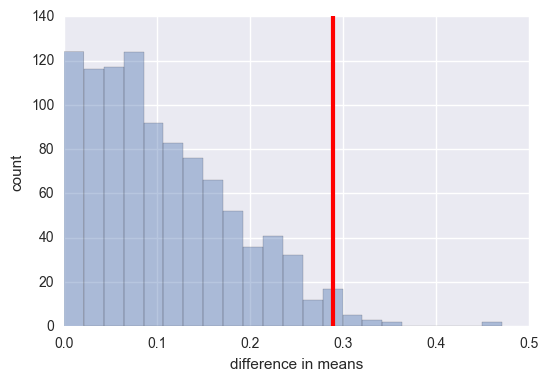

In [62]:
plt.vlines(actual, 0, 140, linewidth=3, color = 'red')
sns.distplot(test_stats, kde = False)
plt.xlabel('difference in means')
plt.ylabel('count')
None

In [63]:
pvalue = sum(test_stats >= actual) / len(test_stats)
pvalue

0

pvalue < .001 means that it is statistically significant. Same conclusion was drawn before. 

### Step 3. Can we predict the heart rate given a body temperature and vice versa?

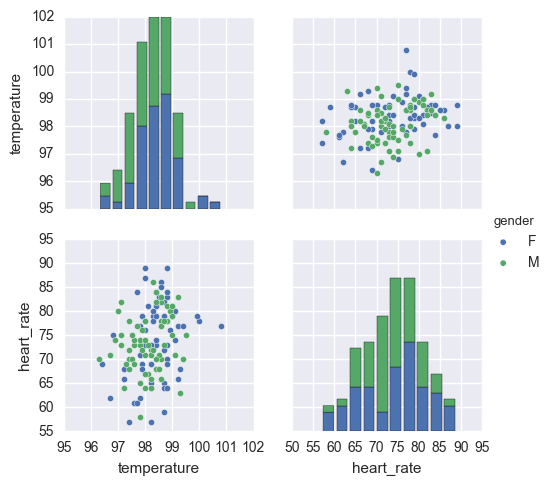

In [64]:
sns.pairplot(df, hue = 'gender')

In [65]:
df.corr()

,temperature,heart_rate
temperature,1.000000,0.253656
heart_rate,0.253656,1.000000


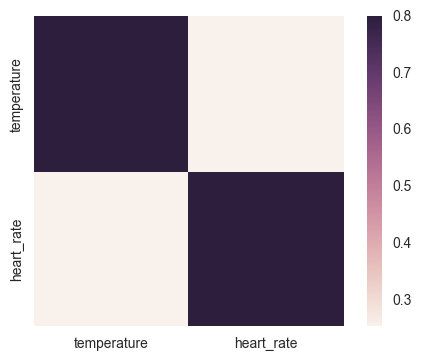

In [66]:
sns.heatmap(df.corr(), vmax=.8, square=True)

Correlation between temperature and heart rate is not very strong (0.25). Prediction score will not be very good with simple linear regression. Let's try to fit it with regression models and try to predict some heart rate with a given (unknown) temperature.

In [67]:
import statsmodels.formula.api as smf
results = smf.ols('df.heart_rate ~ df.temperature', data=df).fit()

In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          df.heart_rate   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     8.802
Date:                Thu, 29 Dec 2016   Prob (F-statistic):            0.00359
Time:                        22:53:27   Log-Likelihood:                -433.75
No. Observations:                 130   AIC:                             871.5
Df Residuals:                     128   BIC:                             877.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       -166.2847     80.912     -2.055      0.042      -326.384    -6.186
df.temperature     2.4432      0.824      2.967      0.004         0.814     4.073
==============================================================================
Omnibus:                        1.549   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.541
Skew:                          -0.183   Prob(JB):                        0.463
Kurtosis:                       2.613   Cond. No.                     1.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
results.params

Intercept        -166.284719
df.temperature      2.443238
dtype: float64

In [70]:
results = smf.ols('df.temperature ~ df.heart_rate', data=df).fit() # Temp as a function of heart rate.
results.params

Intercept        96.306754
df.heart_rate     0.026335
dtype: float64

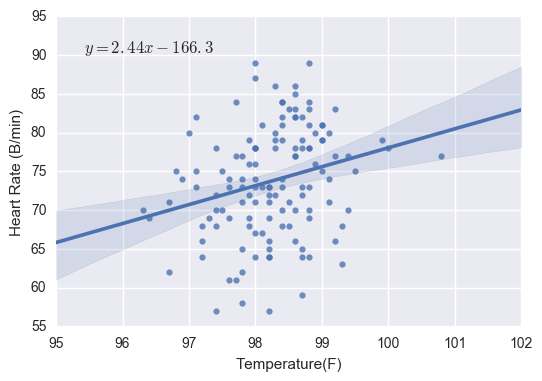

In [71]:
f = plt.figure()
ax = f.add_subplot(111)
sns.regplot(df.temperature, df.heart_rate, data=df);
ax.text(0.2, 0.9,'$y = 2.44x - 166.3$', ha='center', va='center', transform=ax.transAxes)
plt.xlabel('Temperature(F)')
plt.ylabel('Heart Rate (B/min)')

In [72]:
2.44*99 -166.3 # checking one sample heart rate given a tempr 99F.

75.25999999999999

We can also do a regression analysis.

In [73]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [74]:
df1 = df [['temperature', 'heart_rate']]
df1.head()

,temperature,heart_rate
0,99.3,68.0
1,98.4,81.0
2,97.8,73.0
3,99.2,66.0
4,98.0,73.0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(df1.temperature, df1.heart_rate, test_size=0.33, random_state=42)
X_train.shape, y_train.shape

((87L,), (87L,))

In [76]:
X_train, y_train, X_test, y_test = X_train.reshape(-1, 1), y_train.reshape(-1, 1), X_test.reshape(-1, 1), y_test.reshape(-1, 1)

In [77]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.072230799762748488

Score is 72% - which is not good but understandble with a 0.25 correlation between temperature and heart rate.

In [78]:
np.mean((regr.predict(X_test) - y_test) ** 2)

42.529863392163023

In [79]:
regr.intercept_

array([-154.68974368])

In [80]:
regr.coef_

array([[ 2.32774742]])

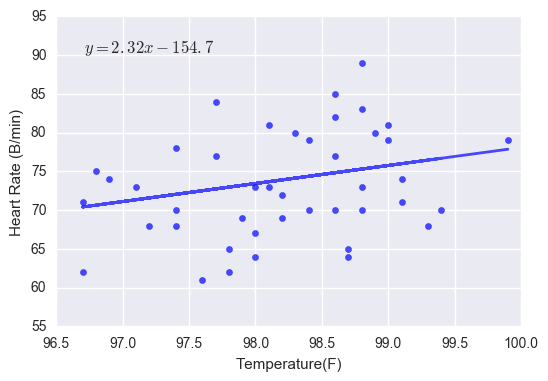

In [81]:
f = plt.figure()
ax = f.add_subplot(111)
plt.scatter(X_test, y_test,  color='blue', alpha = 0.7)
plt.plot(X_test, regr.predict(X_test), color='blue', linewidth=2, alpha = 0.7)
ax.text(0.2, 0.9,'$y = 2.32x - 154.7$', ha='center', va='center', transform=ax.transAxes)
plt.xlim([96.5, 100.0])
plt.xlabel('Temperature(F)')
plt.ylabel('Heart Rate (B/min)')

### Summary

<li> The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. We wanted to answer the question if this value is statistically correct or not. We looked at the dataset which has a total of 130 measurements of body temperatures and heart rates, which were taken from 65 randomly chosen male and female. We can say that the observations are independent because the one temperature (or heart rate) does not influence the outcome of the other. 

<p><li> We found that the sample mean and standard deviation of human body temperature to be 98.25 and 0.73, respectively. We plotted a histogram and found that it has an approximately normal distribution. We used a kernel density distribution function estimator, a probability plot and different normality tests to confirm that the sample distribution is roughly normal. We then set up our null hypothesis assuming that the mean population temperature to be 98.6$^{\circ}$F and did a one sample t-test. Since the sample is large enough (> 30) and distribution is normal, we also did a z-test. Both these tests produced roughly similar results with p-value < 0.001, which suggest that it is unlikely that the mean human body temperature is 98.6$^{\circ}$, contradictory to popular belief!!

<p><li> We then set up the experiment with an estimated mean of 98.25 (which is the sample mean) and found a p-value >> 10%. This suggests that we *cannot* reject the hypothesis that the mean human body temperature is 98.25 $^{\circ}$F. We found a range between 98.12 & 99.37 at 95% confidence level. Even at the 99% confidence level the temperature range (98.01 - 98.42) does not include 98.6$^{\circ}$F. We conclude that the normal human temperature lies between (98.01 - 98.42)$^{\circ}$F at 99% confidence level and it is definitely not a single value (98.6$^{\circ}$F). 

<p><li> The second question to answer was if the average female body temperature is higher than that of a randomly chosen man? We found that the mean female temperature is indeed higher (by .3$^{\circ}$F). We set up a null hypothesis that there is no difference in the mean temperature between male and female, and carried out a t-test. We found a p-value < 5% suggesting that the result is statistically significant and it is likely that we would see higher female temperature in other sample or in general. We did a misclassification rate and a Cohen's d calculation to quantify this effect size and found that 580 out of 1000 times we would see a higher female temperature.

<p><li> Another interesting question was if we see an elevated heart rate with a higher body temperature. We found that there is a weak correlation (0.25 to be exact) between temperature and heart rate. We did two linear regression fits - one with all the samples together using Least Square (OLS) fit model and another with sklearn's linear regression where the data was split into training and testing sets. OLS provided a model fit with '$y = 2.44x - 166.3$', while linear regression predicts '$y = 2.32x - 154.7$'. The linear regression model provided an accuracy score of 72%.